In [2]:
# import numpy as np

# timesteps = 100
# input_features = 32
# output_features = 64

# inputs = np.random.random((timesteps, input_features))

# state_t = np.zeros((output_features,))

# W = np.random.random((output_features, input_features))
# U = np.random.random((output_features, input_features))
# b = np.random.random((output_features,))

# successive_outputs = []
# for input_t in inputs:
#     output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    
#     successive_outputs.append(output_t)
    
#     state_t = output_t
    
# final_output_sequence = np.concatenate(successive_outputs, axis=0)


ValueError: shapes (64,32) and (64,) not aligned: 32 (dim 1) != 64 (dim 0)

In [40]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

#num of words that will be treated as features
max_features = 100
maxlen = 500
batch_size = 32

print("loading the data...")
(input_train, y_train),(input_test, y_test)  = imdb.load_data(num_words = max_features)
#number of training sequences
print(len(input_train), 'training sequences')
#number of testing sequences
print(len(input_test), 'testing sequences')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

print(input_train.shape)
print(input_test.shape)

loading the data...
25000 training sequences
25000 testing sequences
(25000, 500)
(25000, 500)


In [58]:
#training the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
        
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 27s 167ms/step - loss: 0.6927 - acc: 0.5222 - val_loss: 0.6674 - val_acc: 0.6028
Epoch 2/10
157/157 [==============================] - 26s 164ms/step - loss: 0.6399 - acc: 0.6395 - val_loss: 0.6368 - val_acc: 0.6390
Epoch 3/10
157/157 [==============================] - 26s 165ms/step - loss: 0.6172 - acc: 0.6670 - val_loss: 0.5987 - val_acc: 0.6918
Epoch 4/10
157/157 [==============================] - 26s 166ms/step - loss: 0.6002 - acc: 0.6769 - val_loss: 0.6116 - val_acc: 0.6870
Epoch 5/10
157/157 [==============================] - 26s 167ms/step - loss: 0.5875 - acc: 0.6934 - val_loss: 0.6137 - val_acc: 0.6764
Epoch 6/10
157/157 [==============================] - 26s 165ms/step - loss: 0.6113 - acc: 0.6640 - val_loss: 0.6011 - val_acc: 0.6922
Epoch 7/10
157/157 [==============================] - 26s 165ms/step - loss: 0.5778 - acc: 0.7003 - val_loss: 0.6516 - val_acc: 0.5808
Epoch 8/10
157/157 [==============================] - 2

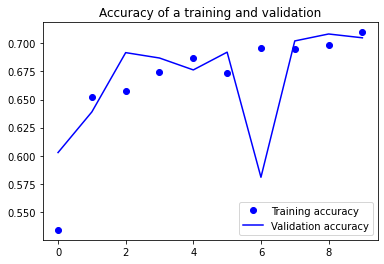

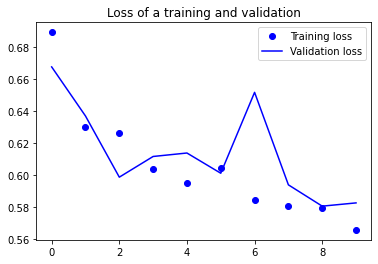

In [61]:
#plot
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Accuracy of a training and validation')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Loss of a training and validation')
plt.legend()

plt.show()